In [5]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [3]:
conn = mysql.connector.connect(
       host ="localhost",
       user = "root",
       password= ""
)

In [6]:
df=pd.read_sql_query("""
SELECT * FROM (
SELECT CONCAT("Match-",CAST(ROW_NUMBER() OVER(ORDER BY ID ) AS CHAR)) AS "match_no",
SUM(batsman_run) AS "run_scored",
SUM(SUM(batsman_run)) OVER w AS "career_score",
AVG(SUM(batsman_run)) OVER w AS "avg_score",
AVG(SUM(batsman_run)) OVER( ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS "running_avg"
FROM campus_x.ipl 
WHERE batter= "V Kohli" 
GROUP BY Id
WINDOW w AS (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)) t 
 
""",conn)

<ipython-input-6-714d57234eff>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query("""


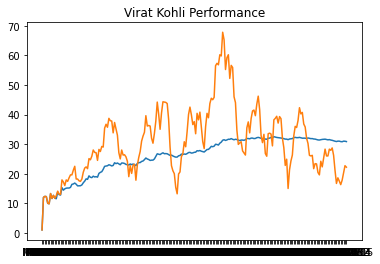

In [11]:
plt.title("Virat Kohli Performance")
plt.plot(df["match_no"],df["avg_score"])
plt.plot(df["match_no"],df["running_avg"])

In [8]:
df

,match_no,run_scored,career_score,avg_score,running_avg
0,Match-1,1.0,1.0,1.0000,1.0000
1,Match-2,23.0,24.0,12.0000,12.0000
2,Match-3,13.0,37.0,12.3333,12.3333
3,Match-4,12.0,49.0,12.2500,12.2500
4,Match-5,1.0,50.0,10.0000,10.0000
...,...,...,...,...,...
210,Match-211,0.0,6509.0,30.8483,16.3000
211,Match-212,20.0,6529.0,30.7972,17.8000
212,Match-213,73.0,6602.0,30.9953,20.3000
213,Match-214,25.0,6627.0,30.9673,22.7000


In [25]:
df1=pd.read_sql_query("""
SELECT t.f_id,f_name,
(total_value/SUM(total_value) OVER())*100  AS "total_percentage"
FROM ( SELECT f_id,SUM(amount) AS "total_value" FROM zomato.orders t1
JOIN zomato.order_details t2
ON t1.order_id=t2.order_id
WHERE t1.r_id =2
GROUP BY f_id) t         
JOIN zomato.food t3
ON t.f_id=t3.f_id
ORDER BY total_percentage DESC
""",conn)

<ipython-input-25-08a9097bff1c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=pd.read_sql_query("""


In [26]:
df1

,f_id,f_name,total_percentage
0,4,Chicken Wings,42.5760
1,3,Choco Lava cake,34.3470
2,5,Chicken Popcorn,23.0769


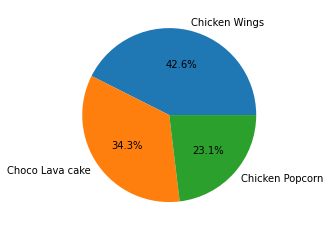

In [27]:
plt.pie(df1["total_percentage"],labels=df1["f_name"],autopct="%0.1f%%")
plt.show()

In [29]:
energy=pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/dataset/dutch-energy.csv")

In [30]:
energy

,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2022-08-04 00:15:00,0.0,NaN,NaN,5613.0,2747.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,466.0,79.0,NaN,0.0,70.0,186.0,52.0
1,2022-08-04 00:30:00,0.0,NaN,NaN,5425.0,2742.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,86.0,NaN,0.0,70.0,210.0,62.0
2,2022-08-04 00:45:00,0.0,NaN,NaN,5039.0,2797.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,90.0,NaN,0.0,69.0,233.0,71.0
3,2022-08-04 01:00:00,0.0,NaN,NaN,4661.0,2805.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,92.0,NaN,0.0,69.0,245.0,75.0
4,2022-08-04 01:15:00,0.0,NaN,NaN,3833.0,2789.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,91.0,NaN,0.0,71.0,264.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38591,2023-09-18 23:00:00,0.0,NaN,NaN,1390.0,467.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,468.0,43.0,NaN,1.0,71.0,3088.0,995.0
38592,2023-09-18 23:15:00,0.0,NaN,NaN,1319.0,468.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,469.0,44.0,NaN,1.0,71.0,3092.0,892.0
38593,2023-09-18 23:30:00,0.0,NaN,NaN,1200.0,469.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,468.0,44.0,NaN,1.0,71.0,3087.0,799.0
38594,2023-09-18 23:45:00,0.0,NaN,NaN,1053.0,468.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,468.0,43.0,NaN,1.0,72.0,3012.0,899.0


In [32]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38596 entries, 0 to 38595
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MTU                              38596 non-null  object 
 1   Biomass                          38565 non-null  float64
 2   Fossil Brown coal/Lignite        0 non-null      float64
 3   Fossil Coal-derived gas          0 non-null      float64
 4   Fossil Gas                       38564 non-null  float64
 5   Fossil Hard coal                 38565 non-null  float64
 6   Fossil Oil                       0 non-null      float64
 7   Fossil Oil shale                 0 non-null      float64
 8   Fossil Peat                      0 non-null      float64
 9   Geothermal                       0 non-null      float64
 10  Hydro Pumped Storage             0 non-null      float64
 11  Hydro Pumped Storage.1           0 non-null      float64
 12  Hydro Run-of-river

In [33]:
energy.columns

Index(['MTU', 'Biomass', 'Fossil Brown coal/Lignite',
       'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal',
       'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Geothermal',
       'Hydro Pumped Storage', 'Hydro Pumped Storage.1',
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine',
       'Nuclear', 'Other', 'Other renewable', 'Solar', 'Waste',
       'Wind Offshore', 'Wind Onshore'],
      dtype='object')

In [39]:
energy["MTU"]=pd.to_datetime(energy["MTU"])

In [45]:
fossil=energy[["MTU","Fossil Gas","Fossil Hard coal"]]

In [51]:
fossil["year"]=fossil["MTU"].dt.year

<ipython-input-51-9b55b15ba7ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil["year"]=fossil["MTU"].dt.year


In [55]:
fossil['date']=fossil["MTU"].dt.date

<ipython-input-55-92a9a19ed631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil['date']=fossil["MTU"].dt.date


In [58]:
df3= fossil[["date","Fossil Gas","Fossil Hard coal"]]

In [65]:
df3.to_csv("energy.csv")

In [61]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

In [63]:
engine=create_engine("mysql+pymysql://root:@127.0.0.1/campus_x")
df3.to_sql("energy",con=engine)

38596